In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso, BayesianRidge, LassoLarsIC, ElasticNet, LinearRegression, LassoCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, make_scorer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import math

## **PART 1. EXPLORING DATA AND VISUALIZATIONS**

### **SCRIPTS FILE:**



### Reading the given csv file and displaying the columns with first five rows specified by .head(5).

Starting with the data file scripts and medical given to explore, all the columns are printed out.

In [100]:
# Reading the given csv file
scriptsFile = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')
print(scriptsFile.head(5))

/var/folders/r8/b1vh2fnj40x1yckp9twj6c880000gn/T/ipykernel_42930/699090533.py:2: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  scriptsFile = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


                         journey_id  cohort_id  \
0  00006390c96ebfffed580074c35a16a7         16   
1  00006390c96ebfffed580074c35a16a7         16   
2  00006390c96ebfffed580074c35a16a7         16   
3  00006390c96ebfffed580074c35a16a7         16   
4  00006390c96ebfffed580074c35a16a7         16   

                                            claim_id patient_gender  \
0  60618bd8d37311da702bf9349e76f8c26d515c082e136f...              M   
1  dbeb47defd161331e43f4e359e8d43e4ef7546ff58359b...              M   
2  02927d081fad10afffcba79bad27f94ff52c98e968aaec...              M   
3  a412c986e2503a5140ed1482e88b5ec50feeedaf2d89ec...              M   
4  b65634edd78998753fe9606b142b2fff7765d6c576973c...              M   

  patient_state  patient_zip patient_dob  pharmacy_npi  pharmacist_npi  \
0            CA        922.0  1961-01-01  1.215361e+09             NaN   
1            CA        922.0  1961-01-01  1.215361e+09             NaN   
2            CA        922.0  1961-01-01  1.215361

### Printing an overview of the data with its data type by using .info()

In [101]:
print(scriptsFile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894623 entries, 0 to 894622
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   journey_id                     894623 non-null  object 
 1   cohort_id                      894623 non-null  int64  
 2   claim_id                       894623 non-null  object 
 3   patient_gender                 894623 non-null  object 
 4   patient_state                  894623 non-null  object 
 5   patient_zip                    894501 non-null  float64
 6   patient_dob                    894619 non-null  object 
 7   pharmacy_npi                   839958 non-null  float64
 8   pharmacist_npi                 21578 non-null   float64
 9   prescriber_npi                 891155 non-null  object 
 10  primary_care_npi               3569 non-null    object 
 11  group_id                       273621 non-null  object 
 12  date_of_service               

### Printing the size of file and describing count, mean values, deviation (key statistics) for the columns given

The function . size() is used to get the size of the file, and .describe() displays the statistical values for the columns provided.

In [102]:
# Printing size of the file by size()
size = scriptsFile.size
print("Size = {}".format(size))

Size = 42941904


In [103]:
print(scriptsFile.describe())

           cohort_id    patient_zip  pharmacy_npi  pharmacist_npi  \
count  894623.000000  894501.000000  8.399580e+05    2.157800e+04   
mean       16.065902     886.761085  1.505555e+09    1.475807e+09   
std         0.248110     121.719342  2.862710e+08    2.925536e+08   
min        16.000000     100.000000  1.003010e+09    1.003455e+09   
25%        16.000000     900.000000  1.255441e+09    1.154909e+09   
50%        16.000000     913.000000  1.497865e+09    1.457999e+09   
75%        16.000000     922.000000  1.740323e+09    1.689011e+09   
max        17.000000     992.000000  6.167056e+09    1.992978e+09   

              ndc11  ndc11_original  number_of_refills_authorized  \
count  8.946230e+05    9.420300e+04                 849519.000000   
mean   3.913810e+10    1.318060e+10                      2.496945   
std    2.808575e+10    2.446082e+10                      6.861014   
min    2.143301e+06    0.000000e+00                     -1.000000   
25%    9.046999e+08    0.000000e+

### Identifying the missing key values

The missing values are checked using the function .isnull(), and .sum() calculates the number of null values present within that column. The result shows multiple null values in patient_zip, patient_dob, quantity_dispensed etc. However, we can see large number of values missing in several columns such as pharmacy_npi, group_id and even date_authorized. The column 'date_authorized' seems to be one of the important attribute having so many null values, which could create inconsistency to the data.

In [104]:
print(scriptsFile.isnull().sum())

journey_id                            0
cohort_id                             0
claim_id                              0
patient_gender                        0
patient_state                         0
patient_zip                         122
patient_dob                           4
pharmacy_npi                      54665
pharmacist_npi                   873045
prescriber_npi                     3468
primary_care_npi                 891054
group_id                         621002
date_of_service                       0
date_authorized                  109947
transaction_type                      0
date_prescription_written             0
ndc11                                 0
ndc11_original                   800420
number_of_refills_authorized      45104
diagnosis_code                   719918
diagnosis_code_type              782989
quantity_prescribed_original     572275
quantity_dispensed                    7
place_of_service                 548426
is_service                       216300


### Displaying the values of Patient State used in this file

**KEY:** 'CA' Letter denotes 'California', 'NY' Letter denotes New York, 'TX' Texas, 'FL' Florida, 'IL' Illinois.

Method .unique() retrives the unique set of values in the provided column

**OBSERVATIONS:** The file contains data for only five states.

In [105]:
# Retrieving unique values
patientState = scriptsFile['patient_state'].unique()
print("List of Patient State:", patientState)

List of Patient State: ['CA' 'NY' 'TX' 'FL' 'IL']


### Displaying the values of Patient Gender used in this file

**KEY:** 'M' denotes Male, 'F' denotes Female.

In [106]:
# Retrieving unique values
patientGender = scriptsFile['patient_gender'].unique()
print("List of patient Gender:", patientGender)

List of patient Gender: ['M' 'F']


### Displaying the values of Diagnosis Code Type used in this file

After filtering the na, and checking the unique values, the length is printed.

**OBSERVATIONS:** The length of the attribute signifies a large number of unique values which is an interesting finding. First 10 values of diagnosis code are then displayed.

In [107]:
# Retrieving unique values
codeType = scriptsFile['diagnosis_code'].dropna().unique()
print("Number of unique values:", len(codeType))
print("Displayng the values:")
print(codeType[0:10])

Number of unique values: 2718
Displayng the values:
['F411' 'N529' 'D126' 'I10' 'F410' 'E782' 'E118' 'E1121' 'L03116' 'N401']


### **MEDICAL FILE:**

### Reading the given csv file and displaying the columns with first five rows specified by .head(5).

Starting with the data file scripts and medical given to explore, all the columns are printed out.

In [108]:
# Reading the given csv file
medicalFile = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')
print(medicalFile.head(5))

                         journey_id                        episode_id  \
0  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
1  00006390c96ebfffed580074c35a16a7  d5e15811af1d772f54af52f3560be0a5   
2  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   
3  00006390c96ebfffed580074c35a16a7  e25e5285e4f66d35c9840bf4e040fe73   
4  00006d564a4718c744f1bbf1b6c5f8c3  42ba4419d9ad7c9293d76686fb608f10   

                                            visit_id  \
0  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
1  f22b7ab885c44afae5449d74f8498f53aea1b2cfa79598...   
2  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   
3  3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...   
4  9e4534892128401c693a6ab2ea758cd6a0a6484972168b...   

                                        encounter_id  claim_date  \
0  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
1  d5a7dc61071d977cef9ff762973d360f4bcf15a19790d9...  2020-07-13   
2  c60da949b58f0351c

### Printing an overview of the data with its data type by using .info()

In [109]:
print(medicalFile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623525 entries, 0 to 623524
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   journey_id         623525 non-null  object 
 1   episode_id         623525 non-null  object 
 2   visit_id           621650 non-null  object 
 3   encounter_id       623525 non-null  object 
 4   claim_date         623525 non-null  object 
 5   patient_state      623525 non-null  object 
 6   patient_short_zip  623512 non-null  float64
 7   patient_age        616980 non-null  float64
 8   patient_gender     623393 non-null  object 
 9   place_of_service   484555 non-null  object 
 10  visit_type         600454 non-null  object 
 11  payor              608936 non-null  object 
 12  payor_channel      586086 non-null  object 
 13  ref_npi            297501 non-null  float64
 14  hcp_npi            434653 non-null  float64
 15  hcp_taxonomy       428209 non-null  object 
 16  hc

### Printing the size of file and describing count, mean values, deviation (key statistics) for the columns given

The function . size() is used to get the size of the file, and .describe() displays the statistical values for the columns provided.

In [110]:
# Printing size of the file by size()
size = medicalFile.size
print("Size = {}".format(size))

Size = 21199850


In [111]:
print(medicalFile.describe())

       patient_short_zip    patient_age       ref_npi       hcp_npi  \
count      623512.000000  616980.000000  2.975010e+05  4.346530e+05   
mean          907.514954      59.416910  1.502083e+09  1.508734e+09   
std            40.034735       9.946158  2.868359e+08  2.825083e+08   
min            74.000000      30.000000  1.003001e+09  1.003001e+09   
25%           900.000000      55.000000  1.255437e+09  1.265668e+09   
50%           911.000000      60.000000  1.508952e+09  1.528016e+09   
75%           922.000000      65.000000  1.740350e+09  1.740376e+09   
max           999.000000      80.000000  1.992999e+09  1.993000e+09   

            hco_npi  rev_center_code  rev_center_units     proc_units  \
count  6.177890e+05    113926.000000     621558.000000  621331.000000   
mean   1.485095e+09       456.083449          1.243236       4.319060   
std    2.859965e+08       451.591644          2.458118      55.208116   
min    1.003006e+09         1.000000        -14.000000       0.00000

### Identifying the missing key values

The missing values are checked using the function .isnull(), and .sum() calculates the number of null values present within that column. The data shows missing values in several columns, few of important one also such as visit_id, patient_age and patient_gender.

In [112]:
print(medicalFile.isnull().sum())

journey_id                0
episode_id                0
visit_id               1875
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip        13
patient_age            6545
patient_gender          132
place_of_service     138970
visit_type            23071
payor                 14589
payor_channel         37439
ref_npi              326024
hcp_npi              188872
hcp_taxonomy         195316
hcp_specialty        195296
hco_npi                5736
hcp_npi_list         188872
hco_npi_list           5736
diag_list               870
diag_1                  870
diag_2               162930
diag_3               258241
diag_4               325292
diag_5               418509
rev_center_code      509599
rev_center_units       1967
proc_code             23913
proc_modifier        457577
proc_units             2194
line_charge               0
claim_charge              0
smart_allowed             0
dtype: int64


### Displaying the values of Visit Type used in this file
Method .unique() retrives the unique set of values in the provided column

**OBSERVATIONS:** The list shows different type of visits, weighing broader area such as home, impatient and emergency rooms.

In [113]:
print("List of Visit Types:")
print(medicalFile['visit_type'].unique())

List of Visit Types:
['home visit' 'outpatient visit' 'laboratory visit' nan
 'emergency room visit' 'inpatient visit' 'ambulance visit'
 'non-hospital institution visit' 'pharmacy visit']


### Displaying the values of Payor Channel used in this file

Method .unique() retrives the unique set of values in the provided column

In [114]:
print("List of Payor Channel:")
print(medicalFile['payor_channel'].unique())

List of Payor Channel:
['managed medicaid' 'commercial' nan 'medicare advantage' 'medicare'
 'medicaid' 'tricare' 'veterans affairs' 'workers comp']


### CORRELATION MATRIX

Correlation Matrix was plotted to check how the variables are related to each other. The datatype with object, or categorical values was excluded to plot the heatmap. corr() function was used to calculate all the values. Seaborn Library was used to plot the heatmap, with color tone as warm for better representation.

**SCRIPTS FILE:**

**INFERENCE:** The matrix shows high positive correlation between level_of_service and authorization_type_code, which could be mapped to higher level of specialised services requiring different and more authorization code. It also suggest no correlation between pharmacy_submitted_cost and patient_pay, which is expected as their could be multiple factors such as Insurance playing a role. 

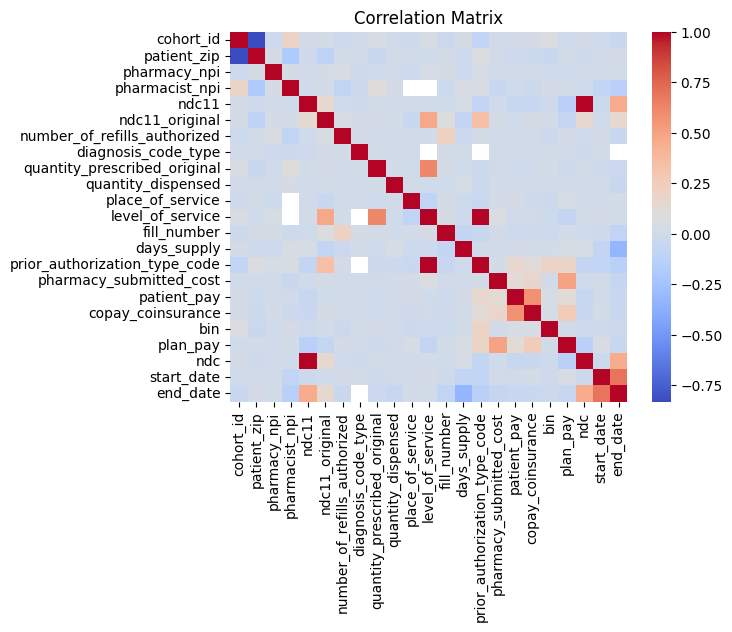

In [115]:
# Removing the object variables and plotting matrix for float and int variables
selectedColumns = scriptsFile.select_dtypes(include=['float64','int64']).columns
selectedColumns = selectedColumns.drop(['coupon_type', 'coupon_value_amount']) 
corrMatrix = scriptsFile[selectedColumns].corr()

sns.heatmap(corrMatrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**MEDICAL FILE:**

The matrix suggests a high correlation between claim_charge and line_charge, which could be due to line charge being a subset of claim, and almost negative correlation between others except hcp_npi and ref_npi.

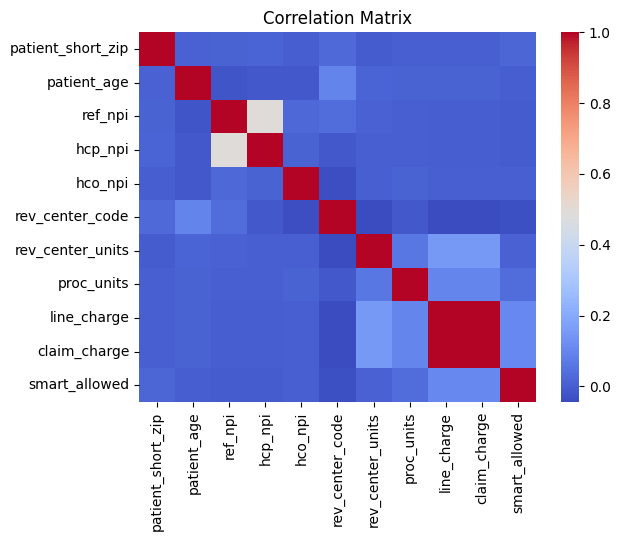

In [116]:
# Removing the object variables and plotting matrix for float and int variables
selectedColumns = medicalFile.select_dtypes(include=['float64','int64']).columns

corrMatrix = medicalFile[selectedColumns].corr()

sns.heatmap(corrMatrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **VISUALIZING DATA**

### **Visualization 1:** Count of Patient across Genders

Diving into the data, the values provided talks about the Patient Diagnosed and prescriped Ozempic dependent on several factors provided. One of the attributes to check the division is Gender which is represented by a categorical value 'patient_gender'. This helps in understanding how it is spread across Male and Female.

Seaborn Library with catplot() is used to construct the bar plot by specifying kind as Count. To make the visualization look more appealing paletter is changed to 'viridis', and a black edge is also defined.

**INSIGHTS:** The graph infers that, the count of 'F' i.e Female is higher than 'M' Male. The difference is approximately around 520K(F) - 380K(t) = 140K.

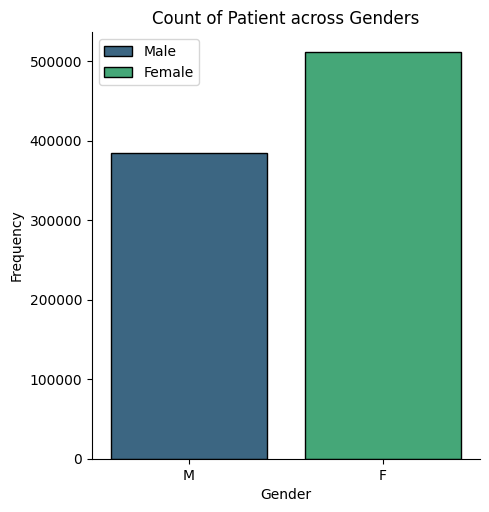

In [117]:
sns.catplot(x='patient_gender', kind='count', data=scriptsFile, hue='patient_gender', palette = 'viridis', edgecolor='black')
plt.title('Count of Patient across Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(labels=['Male', 'Female'])
plt.show()

### **Visualization 2:** Count of Patient across Genders for J3490

**FINDINGS:** However, when the data is filtered on proc_code 'J3490', which suggests use of ozempic, the frequency difference flips with male being higher than female. The difference is of approx around 450-310 = 140.

In [118]:
# Filtering data for ozempic
medicalFileFiltered = medicalFile[medicalFile['proc_code'] == 'J3490']

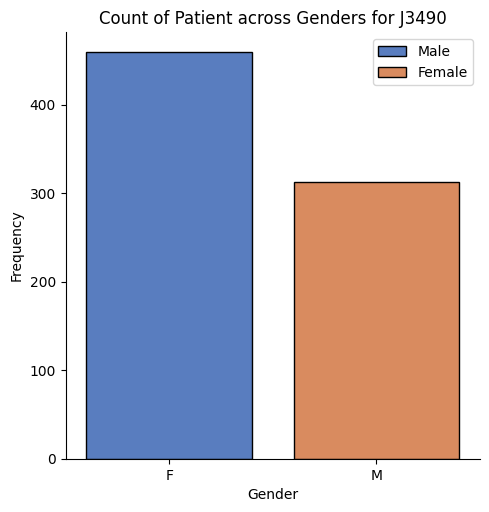

In [119]:
sns.catplot(x='patient_gender', kind='count', data=medicalFileFiltered, hue='patient_gender', palette = 'muted', edgecolor='black')
plt.title('Count of Patient across Genders for J3490')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(labels=['Male', 'Female'])
plt.show()

### **Visualization 3:** Frequency of Different Visit Types

Similarly, a graph for different Visit Types were plotted to check the frequencies. The unique value is taken as x-axis and the Frequency as y-axis. 

**INSIGHTS:** The graph infers that of all the visit types provided , the count of 'outpatient visit' is the highest followed by 'laboratory visits, however, the emergency room visit seems to be quite low for the overall data.

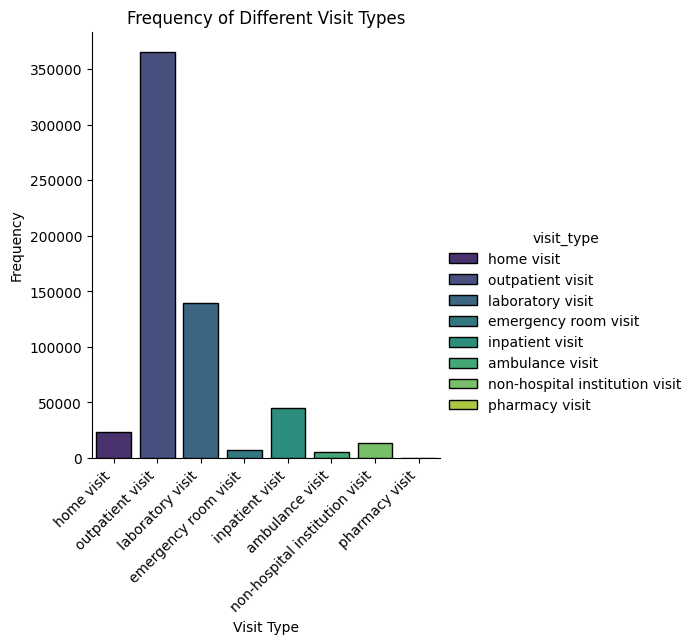

In [120]:
sns.catplot(x='visit_type', kind='count', data=medicalFile, hue='visit_type', palette = 'viridis', edgecolor='black')
plt.title('Frequency of Different Visit Types')
plt.xlabel('Visit Type')
plt.ylabel('Frequency')
# Rotating the labels for a better view
plt.xticks(rotation=45, ha='right')
plt.show()

### **Visualization 4:** Count of Patient States

To dive deep, a bar plot to check the patient across different states were plotted. The unique value is taken as x-axis and the Frequency as y-axis. 

**INSIGHTS:** The graph suggests the highest frequency of 'CA' with a visible difference from all the other states being in a same range. There is a difference of more than 700k. This could be due to potential bias also of collecting more data in CA or even self-selection bias.

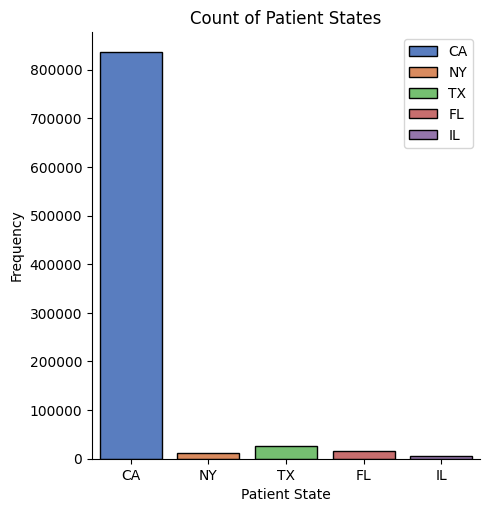

In [121]:
sns.catplot(x='patient_state', kind='count', data=scriptsFile, hue='patient_state', palette = 'muted', edgecolor='black')
plt.title('Count of Patient States')
plt.xlabel('Patient State')
plt.ylabel('Frequency')
plt.legend(labels=['CA', 'NY','TX','FL','IL'])
plt.show()

### **Visualization 5:** Relationship between first and second diagnosis

To check how, diagnosis 1 and diagnosis 2 are affected by each other, a scatterplot for the same was constructed. 'Diag 2' was taken on x-axis, whereas 'Diag 1' on y-axis. The different color shades suggests different values across. Since, the data is large, using frac() function to take out a chunk of values.

**INSIGHTS:** The graph suggests that for the high range of Diagnosis 2, Diagnosis 1 appears to be low. This infers a high negative correlation as observed from the graph also, with the data points forming the straight line supporting the prioritization method in a lot of medical fields due to classification of primary and secondary data.

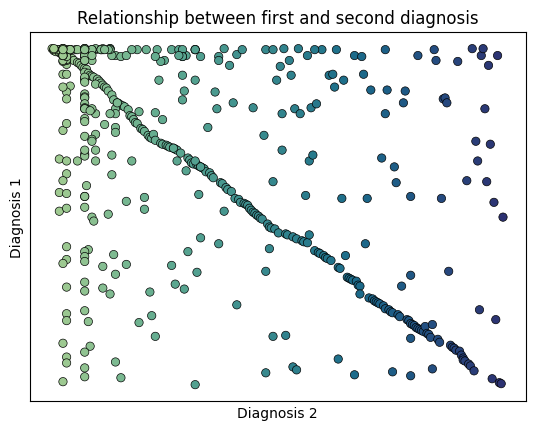

In [122]:
updatedMedicalFile = medicalFile.sample(frac=0.001)
sns.scatterplot(x='diag_2', y='diag_1', data=updatedMedicalFile, hue='diag_2', palette='crest', edgecolor='black', legend = False)
plt.xlabel('Diagnosis 2')
plt.ylabel('Diagnosis 1')
plt.title('Relationship between first and second diagnosis')

# Removing x label and y label due to large values and unclear representation
plt.xticks([])
plt.yticks([])
plt.show()

### **Visualization 6:** Visit type vs Diagnosis

To check how Visit type affects Diagnosis 1, a boxplot was created for Types. The x-axis plots types whereas y-axis shows the diagnosis 1.

**INSIGHTS:** The graph infers that the impatient visit shows a larger variance, whereas pharmacy visit shows zero and collapses. Outpatient visist and home visit shows similar mean and variance. We could also see numerous outliers present, due to inconsistency in data. These outliers if extreme could influence the representation. 

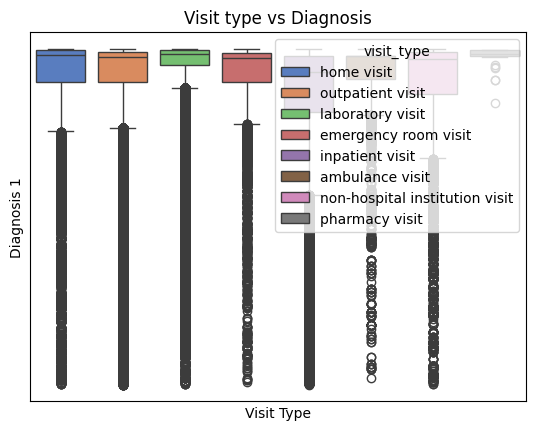

In [123]:
# Using frac() to extract a chunk of data points
updatedMedicalFile = medicalFile.sample(frac=0.000001)
sns.boxplot(x='visit_type', y='diag_1', hue = 'visit_type', data=medicalFile, palette = 'muted')
plt.title('Visit type vs Diagnosis')
plt.xlabel('Visit Type')
plt.ylabel('Diagnosis 1')

# Removing x label and y label due to large values and unclear representation
plt.xticks([])
plt.yticks([])
plt.show()

### **Visualization 7:** Distribution of Patient Age

A histogram was plotted to check the frequency of Age distribution with x-axis as the Age and y-axis as frequency.

**INSIGHTS:** The graphs shows a left skewness, i.e the frequency is higher in the higher values of Age. It also shows a higher number of patient in bracket 55-75 age, which relates to the usual medical visits of people with increasing age.

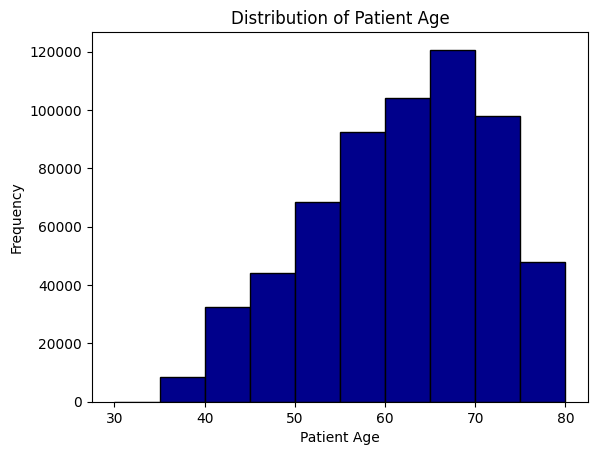

In [124]:
plt.hist(medicalFile['patient_age'], color='darkblue', edgecolor='black')  
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Age')
plt.show()

### **Visualization 8:** Patient State vs Diagnosis

In the end, to check how Diagnosis 2 varies with the state of patient, a boxplot was created. The x-axis plots state whereas y-axis shows the diagnosis 2.

**INSIGHTS:** The graph infers that Alaska shows a larger variance, whereas it can be noticed 'AE' having no mean line. 'AE' stands for Armed Forces Europe here having only one outlier in the plot, ehich could be due to less data.

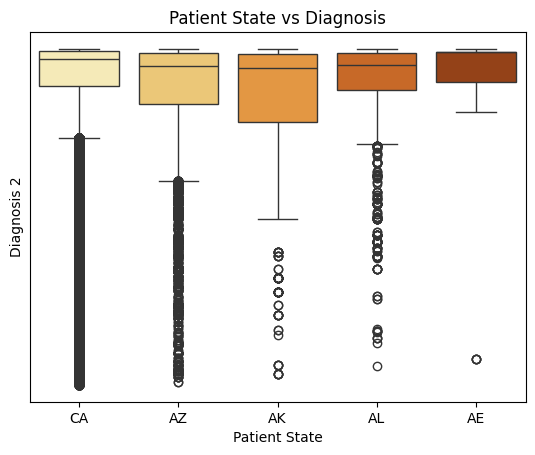

In [125]:
updatedMedicalFile = medicalFile.sample(frac=0.000001)
sns.boxplot(x='patient_state', y='diag_2', hue = 'patient_state', data=medicalFile, palette = 'YlOrBr')
plt.title('Patient State vs Diagnosis')
plt.xlabel('Patient State')
plt.ylabel('Diagnosis 2')
#plt.xticks([])
plt.yticks([])
plt.show()

## **PART 2: DATA PREPROCESSING AND MERGING:**

### DATA PREPROCESSING

Filtering the data based on the J code of ozempic, and finding the diagnosis associated to it. This means that for all these diagnosis, ozempic was suggested. Sorting the list on descending counts, to infer the highest diagnosis with ozempic reference.

The code shows: 'I10', 'E119' AND 'Z0000'.

In [126]:
medicalFileFiltered = medicalFile[medicalFile['proc_code'] == 'J3490']
unique_diagnosis_codes = medicalFile['diag_1'].unique()
count_codes = medicalFile['diag_1'].value_counts()
sorted_codes = count_codes.sort_values(ascending=False).head(10)
print(sorted_codes)

diag_1
I10      43637
Z0000    29394
E119     25784
E1165    13187
Z0001    10797
G4733     8587
E1169     8554
E785      7416
R079      5761
N390      5157
Name: count, dtype: int64


### HANDLING MISSING VALUE

There are various approach used to handle the null values depending on the columns description. Rows with null values are dropped for 'pcn', since this is a variable not being useful in any of the equation. Value '0' is filled for ndc11 column since it is an identifier. Median Imputation is used to substitute patient_dob, date_authorized, as average of date does not make sense, these are first converted to datetime. Other columns with quantitative values are then replaced with 'mean' imputation, this does not drop out the entire row and let the row numvers be intact with other values. Additionally, we also use .mode() to impute the most occuring value in columns such as 'diagnosis_code, and 'patient_zip'.

NOTE: Handling the values in this step, assuming which could be used in the model.

In [127]:
# Checking the length of pcn, if the variable can be dropped or not
# Since, there are 642 unique values, the variable can be dropped
len(scriptsFile['pcn'].unique())

642

In [131]:
# Converting type string to datetime format
scriptsFile['date_authorized'] = pd.to_datetime(scriptsFile['date_authorized'])
scriptsFile['patient_dob'] = pd.to_datetime(scriptsFile['patient_dob'])

# Dropping rows for missing values 
scriptsFile = scriptsFile.dropna(subset=['pcn'])

# Substituting ndc11 null values with 0
scriptsFile['ndc11'].fillna(0, inplace=True)

# Substituing mode values for the given columns
scriptsFile['patient_zip'].fillna(scriptsFile['patient_zip'].mode()[0], inplace=True)
scriptsFile['diagnosis_code'].fillna(scriptsFile['diagnosis_code'].mode()[0], inplace=True)
scriptsFile['diagnosis_code_type'].fillna(scriptsFile['diagnosis_code_type'].mode()[0], inplace=True)
scriptsFile['unit_of_measure'].fillna(scriptsFile['unit_of_measure'].mode()[0], inplace=True)

# Substituing median values for the given columns
scriptsFile['patient_dob'].fillna(scriptsFile['patient_dob'].median(), inplace=True)
scriptsFile['date_authorized'].fillna(scriptsFile['date_authorized'].median(), inplace=True)


# Substituing mean values for the given columns
scriptsFile['quantity_prescribed_original'].fillna(scriptsFile['quantity_prescribed_original'].mean(), inplace=True)
scriptsFile['quantity_dispensed'].fillna(scriptsFile['quantity_dispensed'].mean(), inplace=True)
scriptsFile['number_of_refills_authorized'].fillna(scriptsFile['number_of_refills_authorized'].mean(), inplace=True)
scriptsFile['patient_pay'].fillna(scriptsFile['patient_pay'].mean(), inplace=True)
scriptsFile['pharmacy_submitted_cost'].fillna(scriptsFile['pharmacy_submitted_cost'].mean(), inplace=True)


# Checking values for imputation                                
print(scriptsFile.isnull().sum())

journey_id                            0
cohort_id                             0
claim_id                              0
patient_gender                        0
patient_state                         0
patient_zip                           0
patient_dob                           0
pharmacy_npi                      53272
pharmacist_npi                   754405
prescriber_npi                     3183
primary_care_npi                 772154
group_id                         505246
date_of_service                       0
date_authorized                       0
transaction_type                      0
date_prescription_written             0
ndc11                                 0
ndc11_original                   682725
number_of_refills_authorized          0
diagnosis_code                        0
diagnosis_code_type                   0
quantity_prescribed_original          0
quantity_dispensed                    0
place_of_service                 432697
is_service                       108453


In [132]:
# Checking the length of hcp_npi_list, hco_npi_list, if the variable can be dropped or not. Since, the unique values are large, it does not make sense to impute data
print(len(medicalFile['hcp_npi_list'].unique()))
print(len(medicalFile['hco_npi_list'].unique()))

32494
14592


In [133]:
# Dropping rows for missing values 
medicalFile = medicalFile.dropna(subset=['hcp_npi_list'])
medicalFile = medicalFile.dropna(subset=['hco_npi_list'])

# Substituing mode values for the given columns
medicalFile['patient_gender'].fillna(medicalFile['patient_gender'].mode()[0], inplace=True)
medicalFile['patient_short_zip'].fillna(medicalFile['patient_short_zip'].mode()[0], inplace=True)
medicalFile['visit_type'].fillna(medicalFile['visit_type'].mode()[0], inplace=True)


# Substituing mean values for the given columns
medicalFile['patient_age'].fillna(medicalFile['patient_age'].mean(), inplace=True)

# Checking values for imputation                                
print(medicalFile.isnull().sum())

journey_id                0
episode_id                0
visit_id                746
encounter_id              0
claim_date                0
patient_state             0
patient_short_zip         0
patient_age               0
patient_gender            0
place_of_service     119896
visit_type                0
payor                  9647
payor_channel         26192
ref_npi              239443
hcp_npi                   0
hcp_taxonomy           5616
hcp_specialty          5596
hco_npi                   0
hcp_npi_list              0
hco_npi_list              0
diag_list               459
diag_1                  459
diag_2                89770
diag_3               155066
diag_4               199916
diag_5               251600
rev_center_code      330424
rev_center_units        839
proc_code             20672
proc_modifier        302809
proc_units              638
line_charge               0
claim_charge              0
smart_allowed             0
dtype: int64


### ENCODING CATEGORICAL VARIABLES

The categorical variables are converted into dummy variables, marked 0 or 1. One Hot Encoding with get_dummies() is used to dummy the column diagnosis. drop_first flag helps us avoid multicollinearity. The dummy is then stored in new data frame 'scriptsFile' and 'medicalFile' respectively. The function np.where() is used to substitute numerical value '1' with Flag True and '0' with False.

**SCRIPTS FILE:**

In [134]:
# Encoding the categorical values for column 'patient_gender', using 'patient_state' as base reference and encoding 
scriptsFile = pd.get_dummies(scriptsFile, columns=['patient_gender'], drop_first = True)
scriptsFile = pd.get_dummies(scriptsFile, columns=['patient_state'], drop_first = True)

**GROUPING WITH JOURNEY ID:**

Since, the file contains duplicate journey ids, grouping them together and getting a count of multiple rows which is stored in 'no_of_visits' for prescription.
The other duplicated rows are then removed with the function drop_duplicates(). Since, the rows are grouped resetting the index and displaying the first 10 rows.

In [135]:
# Groupby() groups the data specified by the attribute and .transform() helps to count
grouped_counts = scriptsFile.groupby('journey_id')['journey_id'].transform('count')
scriptsFile['no_of_visits'] = grouped_counts
scriptsFile = scriptsFile.drop_duplicates(subset='journey_id')


In [136]:
scriptsFile.reset_index(drop=True, inplace=True)
scriptsFile.head(10)

,journey_id,cohort_id,claim_id,patient_zip,patient_dob,pharmacy_npi,pharmacist_npi,prescriber_npi,primary_care_npi,group_id,...,ndc,active,start_date,end_date,patient_gender_M,patient_state_FL,patient_state_IL,patient_state_NY,patient_state_TX,no_of_visits
0,00006390c96ebfffed580074c35a16a7,16,60618bd8d37311da702bf9349e76f8c26d515c082e136f...,922.0,1961-01-01,1.215361e+09,NaN,1750479168,NaN,NaN,...,47335067381,True,190001,NaN,True,False,False,False,False,28
1,000072bc05e31d0126475c7a3e771af1,16,39305dcc71e6d6cdcfc627395892c57544305c2a0b9d4b...,921.0,1968-01-01,NaN,NaN,1952412181,NaN,NaN,...,16714018301,True,190001,NaN,True,False,False,False,False,67
2,0002af1d15822206675ddbf0242017e6,16,77b9f1e0c63f451dc2c2f269d1b15fb5c0c9a8a8ab3e5f...,913.0,1978-01-01,1.790700e+09,NaN,1518996974,NaN,fd27e02ca7e589c323064909a00c1a94bdca1776,...,68645053254,True,190001,NaN,True,False,False,False,False,79
3,0003ff8dd03803a9197ed01075f4b094,16,50c57a53eea99e567743547578b2fd808f15095111cf08...,922.0,1959-01-01,1.649295e+09,NaN,1962801902,NaN,187fbdac6d15346703bf497ea5358686a8a18650,...,45802005935,True,190001,NaN,False,False,False,False,False,264
4,0004029899177171c9851df0a5916b02,16,fccd79b0c2e09583eca84fbf35b58a40c4c82a88f4036f...,900.0,1958-01-01,1.629438e+09,NaN,1639279417,NaN,NaN,...,80777028299,True,190001,NaN,True,False,False,False,False,1
5,0004bed2670fd243392dc3a994da3f8a,16,4a6cc193db963df77b222d788379c4ec6c77c3b172ea65...,911.0,1970-01-01,1.720093e+09,NaN,1538188149,NaN,NaN,...,781261305,True,190001,NaN,True,False,False,False,False,1
6,0004da06b6b88eb1375e7a772a1d3162,16,08a969330a5cacebcbd291f3cdff27191c27914365275b...,900.0,1963-01-01,1.780793e+09,NaN,1003073826,NaN,cbc7b2c978adb056eecb757516e714982d70e121,...,31722070290,True,190001,NaN,True,False,False,False,False,71
7,00056d0b79fda876cae788d6920c902a,17,c5a73033411f411a247d18863ae14170925718b70b5935...,112.0,1955-01-01,1.871697e+09,1.982928e+09,1568498590,NaN,NaN,...,47781065410,True,190001,NaN,False,False,False,True,False,421
8,00056d978dce9b6f87ee68765b0f5cb2,16,495455809290a448cd2b5c9df09a7fedb9c5c47950c3dd...,912.0,1954-01-01,1.538109e+09,NaN,1699738047,NaN,95808c01a7ca6449ab0bb5adc32c22b578b86a0b,...,65162010150,True,190001,NaN,False,False,False,False,False,72
9,000611c33bf684a7fec8eb5bf8ef2c80,16,b8516e5e51991d04c94b3f711b2f27d23c4549ca4a25d7...,922.0,1970-01-01,1.609986e+09,NaN,1689693517,NaN,3a9ae138e2308e5f2138c6e09b74169d60d470da,...,169413212,True,190001,NaN,False,False,False,False,False,9


**CREATING TREATMENT VARIABLE:**
To identify the treatment variable, J code is filterd and the ids are stored in a list. The variable is then marked as 1 where the code is present and as 0, where it is not. This creates a dummy variable named 'ozempicVariable', which would be used in the model.

In [137]:
ozempicIdentified = list(medicalFile['journey_id'][medicalFile['proc_code'] == 'J3490'].unique())
ozempicIdentified

['000450be3d71b0ec84e8e6edf40aadfa',
 '000f72e2fe46f4f45744f3a7f64894ce',
 '0012fd7f7c19414e99dd240c9b4b1952',
 '00261b40936d4e0cf4c4de7b04fcf250',
 '003bbf4fc6d2b11f48cea923c85172b5',
 '004d43982ab0a95c30b06cae62471978',
 '005947d5f4f8db86b31e99372c93f549',
 '006d954a77c9fea4a77d46a5c4abc471',
 '00929d599d8fdd0ce6981a79c0f6c7cb',
 '00dc1b28e10465a43a3e59e11cfe2f35',
 '00e5bbce9d86b3f93fc14423e8ff978a',
 '00eda43172015ee0700a12f0347993da',
 '010e43cba14ea806bc28f5d238a26eeb',
 '011a5dbefc8f65e48d2d7ce000076550',
 '0128807972e84c204f15d229ae7906d3',
 '016a701e8914646f6088c3b6fdcb5f2e',
 '01723fa5b9726322d48832b79dd099f3',
 '0183111d2ff6fe9f34291fec69142950',
 '0186ae0093ae371fc7a235036cda732b',
 '01c0e8f8f89a203899fceba1102667c5',
 '01c38a89e3a9cfecb2cd6916d74668cb',
 '01d9b65ff50b3467f1838bb5f98d672b',
 '01d9fc88e4e9c10bcaf4c64dfc5d948f',
 '01e7c90639ae5cdf0a0c08b98ce64509',
 '02147934a42b1cab0296b24cc65dbec7',
 '0230078f2c52ce78c0d3ddba01889620',
 '023983e62b003534e483c713c5510da7',
 

**MEDICAL FILE:**

Similarly encoding the categorical values to get dummys and grouping by based on journey id. The duplicate rows are then dropped and the count is stored as 'no_of_claim' for medical services rendered. 

In [138]:
# Encoding variables using get_dummies() and using drop_first to drop first encoded column, to get reference
medicalFile = pd.get_dummies(medicalFile, columns=['patient_gender'], drop_first = True)
medicalFile = pd.get_dummies(medicalFile, columns=['patient_state'], drop_first = True)
medicalFile = pd.get_dummies(medicalFile, columns=['visit_type'], drop_first = True)
medicalFile = pd.get_dummies(medicalFile, columns=['payor_channel'], drop_first = True)

In [139]:
# Similarly, grouping duplicate journey ids, to avoid cross join and storing the count as medical claims, resetting the index further
grouped_counts = medicalFile.groupby('journey_id')['journey_id'].transform('count')
medicalFile['no_of_claim'] = grouped_counts
medicalFile = medicalFile.drop_duplicates(subset='journey_id')

In [140]:
medicalFile.reset_index(drop=True, inplace=True)
medicalFile.head(10)

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_short_zip,patient_age,place_of_service,payor,ref_npi,...,visit_type_outpatient visit,visit_type_pharmacy visit,payor_channel_managed medicaid,payor_channel_medicaid,payor_channel_medicare,payor_channel_medicare advantage,payor_channel_tricare,payor_channel_veterans affairs,payor_channel_workers comp,no_of_claim
0,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,922.0,60.0,Office,inland empire health plan,1.619408e+09,...,True,False,False,False,False,False,False,False,False,2
1,00006d564a4718c744f1bbf1b6c5f8c3,cad5e8635fd011bfec2b65d161b15254,3b0f0f71ac05c34ab9307c4853f1af59420c07b522cdf2...,eafff3ebf33ebe534edc66e761d9b52d1381653d9d0d57...,2019-11-01,900.0,50.0,Office,centene corporation,1.619903e+09,...,True,False,False,False,False,False,False,False,False,14
2,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,8b53ffacbf985d68cbf2aa8e6a9e63a3662c4eddfef1d5...,2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...,2023-02-03,921.0,55.0,Office,blue shield of california,1.952412e+09,...,True,False,False,False,False,False,False,False,False,2
3,00011020325337a2a22fb26b6492196a,b2c64ae3446f18774940259e7f096541,f6652668408a2ce31adfc1125e54151deba1e0e87ad62e...,896775ac2d7798435e2998d043058557bbe87bd441074a...,2023-01-03,922.0,75.0,Office,brand new day,1.366518e+09,...,True,False,False,False,False,False,False,False,False,47
4,00012bb21b3136f52c1c0774071f2ec2,7729a8e2d143a1a8117709cb82fbac56,88904135337a0a5c9ec430f561b82e4ee7f709b56da1d8...,cb11d1a829f2040a4eac3b1b9c7faa3fc7df14e1cee899...,2023-02-03,910.0,50.0,Office,NaN,NaN,...,True,False,False,False,False,False,False,False,False,1
5,00025243850b83969606f3f2aafc2d99,370ffbbbe53ed015f4da4b8b36835bf8,659fd72952b8a29848ce54c3c2c3fe6e486e08ae4b064b...,708501c5f87d9657427f3b363aa57fee4dba0b4f44bce9...,2022-01-04,910.0,70.0,Emergency Room - Hospital,blue shield of california,1.154948e+09,...,True,False,False,False,False,True,False,False,False,5
6,00028eaddd25f1151c94035997b5aab5,988053b794278da04d440d2d4f56ab08,e23698ce9926b91d56c7204646b1908bbe9b70b199ba17...,3eaa2500c931272d6013d48c82834e40e9bee80dc6ddad...,2022-04-18,900.0,70.0,Federally Qualified Health Center,blue shield of california,1.134533e+09,...,True,False,False,False,False,True,False,False,False,14
7,0002af1d15822206675ddbf0242017e6,d2d0d6d5757b5b16629a91c94b6a6459,89ac58e5328c9dee6d9ae04b734bd4565d695ee6a094cc...,1fb7d7cb78ee92073f74ed89c02a03facbc272620f930b...,2023-09-09,913.0,45.0,NaN,blue shield of california,NaN,...,True,False,False,False,False,False,False,False,False,7
8,000362c8cc869075f4c2b6533887d4aa,52ceb00e0607228759315e198b38cbc1,e6a7f37178fb5bcd65b6f4d3c9e633870e9219e9d64223...,b8e57d7b3a1a45938edaf4f2264fdfbe08e773792d384e...,2023-01-03,913.0,65.0,Office,blue shield of california,1.699753e+09,...,True,False,False,False,False,False,False,False,False,7
9,00036c1c0fa135d6cb066c204259bddf,884e0fbfc1801d5307f958f38afe4f9d,7f9af2c1a1126d084862d611c84521c3cf9b94722df88f...,87c18ad9475dfe4a3c10a2e8691b78fac44f91fcbbacab...,2020-03-14,913.0,55.0,NaN,l.a. care health plan,NaN,...,True,False,True,False,False,False,False,False,False,10


**ADDING TREATMENT VARIABLE TO FILE:**

In [141]:
# TREATMENT VARIABLE: Substituting 1, where id is identified with the Jcode in proc
medicalFile['ozempicVariable'] =  np.where(medicalFile['journey_id'].isin(ozempicIdentified),1,0)

### MERGING DATASETS:

The file is then merged on the journey id having inner join, and the duplicated column is then handled by the function .duplicated() checking ~ for not inclusion. .loc handles the array positions efficiently.

In [142]:
# Merging with on suggesting the variable and how specifying the type of join.
mergedFile = pd.merge(medicalFile, scriptsFile, on='journey_id', how='inner')

In [143]:
mergedFile = mergedFile.loc[:, ~mergedFile.columns.duplicated()]
mergedFile.head(5)

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_short_zip,patient_age,place_of_service_x,payor,ref_npi,...,ndc,active,start_date,end_date,patient_gender_M_y,patient_state_FL,patient_state_IL,patient_state_NY,patient_state_TX,no_of_visits
0,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,922.0,60.0,Office,inland empire health plan,1.619408e+09,...,47335067381,True,190001,NaN,True,False,False,False,False,28
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,8b53ffacbf985d68cbf2aa8e6a9e63a3662c4eddfef1d5...,2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...,2023-02-03,921.0,55.0,Office,blue shield of california,1.952412e+09,...,16714018301,True,190001,NaN,True,False,False,False,False,67
2,0002af1d15822206675ddbf0242017e6,d2d0d6d5757b5b16629a91c94b6a6459,89ac58e5328c9dee6d9ae04b734bd4565d695ee6a094cc...,1fb7d7cb78ee92073f74ed89c02a03facbc272620f930b...,2023-09-09,913.0,45.0,NaN,blue shield of california,NaN,...,68645053254,True,190001,NaN,True,False,False,False,False,79
3,0003ff8dd03803a9197ed01075f4b094,9ca7537f9020dfe6a048a15e6c17bca6,26be6074601c058bd052eea8c3c19eb03562ef113311b1...,9bd3b0e5dd7854157cef61d69af044dae2b52ecc58f84d...,2023-07-17,922.0,60.0,Office,molina healthcare,NaN,...,45802005935,True,190001,NaN,False,False,False,False,False,264
4,0004029899177171c9851df0a5916b02,65471f567f945aa51cf81016186722c2,2c5c112350fda715bfb4d6e8f74d8ffda2b8ec048cbac5...,a2b03b9bd55699f7f8588fdef7f8a5d26c6d7d0c298a74...,2023-04-19,900.0,65.0,Office,centers for medicare & medicaid services (cms),NaN,...,80777028299,True,190001,NaN,True,False,False,False,False,1


In [144]:
# Brainstorming - Rough work
# x -> patient_age, patient_gender_M_y, patient_state_FL, patient_state_IL, patient_state_NY, patient_state_TX, patient_state_AK, patient_state_AL, patient_state_AZ, patient_state_CA, quantity_dispensed, quantity_prescribed_original, visit_type_non-hospital institution visit, visit_type_outpatient visit, visit_type_pharmacy visit, payor_channel_managed medicaid, payor_channel_medicaid, payor_channel_medicare advantage, payor_channel_tricare, payor_channel_veterans affairs, payor_channel_workers comp      
# y -> visit_type == emergency room visit, diagnosis_code

In [145]:
mergedFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Columns: 102 entries, journey_id to no_of_visits
dtypes: bool(25), datetime64[ns](2), float64(32), int64(7), object(36)
memory usage: 7.8+ MB


In [146]:
# Printing the columns in the resulting merged dataset
print(mergedFile.columns.tolist())

['journey_id', 'episode_id', 'visit_id', 'encounter_id', 'claim_date', 'patient_short_zip', 'patient_age', 'place_of_service_x', 'payor', 'ref_npi', 'hcp_npi', 'hcp_taxonomy', 'hcp_specialty', 'hco_npi', 'hcp_npi_list', 'hco_npi_list', 'diag_list', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5', 'rev_center_code', 'rev_center_units', 'proc_code', 'proc_modifier', 'proc_units', 'line_charge', 'claim_charge', 'smart_allowed', 'patient_gender_M_x', 'patient_state_AK', 'patient_state_AL', 'patient_state_AZ', 'patient_state_CA', 'visit_type_emergency room visit', 'visit_type_home visit', 'visit_type_inpatient visit', 'visit_type_laboratory visit', 'visit_type_non-hospital institution visit', 'visit_type_outpatient visit', 'visit_type_pharmacy visit', 'payor_channel_managed medicaid', 'payor_channel_medicaid', 'payor_channel_medicare', 'payor_channel_medicare advantage', 'payor_channel_tricare', 'payor_channel_veterans affairs', 'payor_channel_workers comp', 'no_of_claim', 'ozempicVariable

In [147]:
# Checking the null values again before running the data
mergedFile['quantity_prescribed_original'].fillna(scriptsFile['quantity_prescribed_original'].mean(), inplace=True)
mergedFile['quantity_dispensed'].fillna(scriptsFile['quantity_dispensed'].mean(), inplace=True)

In [150]:
print(mergedFile.isnull().sum())

journey_id           0
episode_id           0
visit_id            33
encounter_id         0
claim_date           0
                    ..
patient_state_FL     0
patient_state_IL     0
patient_state_NY     0
patient_state_TX     0
no_of_visits         0
Length: 102, dtype: int64


### Printing the size of file and describing count, mean values, deviation (key statistics) for the columns given

In [151]:
# Printing size of the file by size()
size = mergedFile.size
print("Size = {}".format(size))

Size = 1309068


In [152]:
print(mergedFile.describe())

       patient_short_zip   patient_age       ref_npi       hcp_npi  \
count       12834.000000  12834.000000  6.468000e+03  1.283400e+04   
mean          905.378760     58.838247  1.499867e+09  1.507954e+09   
min            88.000000     35.000000  1.003001e+09  1.003001e+09   
25%           900.000000     50.000000  1.245499e+09  1.265445e+09   
50%           912.000000     60.000000  1.508111e+09  1.518550e+09   
75%           921.000000     65.000000  1.750331e+09  1.750313e+09   
max           999.000000     80.000000  1.992989e+09  1.993000e+09   
std            51.602431      9.914789  2.884385e+08  2.836739e+08   

            hco_npi  rev_center_code  rev_center_units    proc_units  \
count  1.283400e+04      2075.000000      12801.000000  12799.000000   
mean   1.484708e+09       392.137831          1.108976      3.437378   
min    1.003073e+09         1.000000          1.000000      0.000000   
25%    1.235108e+09       300.000000          1.000000      1.000000   
50%    1.

## **PART 3: CASUAL ANALYSYS SETUP**


Checking with the file given, how treatment variable defined varies with few of the covariates. Treatment variable is boolean data type having 1, if the row has proc_code 'J3490'. Few of the covariates taken are patient_age, line_charge, patient_pay and refills.

In [157]:
describe1 = mergedFile[mergedFile['ozempicVariable'] == 0]['patient_age'].describe()
describe2 = mergedFile[mergedFile['ozempicVariable'] == 1]['patient_age'].describe()

lineCharge1 = mergedFile[mergedFile['ozempicVariable'] == 0]['line_charge'].describe()
lineCharge2 = mergedFile[mergedFile['ozempicVariable'] == 1]['line_charge'].describe()

claimCharge1 = mergedFile[mergedFile['ozempicVariable'] == 0]['claim_charge'].describe()
claimCharge2 = mergedFile[mergedFile['ozempicVariable'] == 1]['claim_charge'].describe()

pay1 = mergedFile[mergedFile['ozempicVariable'] == 0]['patient_pay'].describe()
pay2 = mergedFile[mergedFile['ozempicVariable'] == 1]['patient_pay'].describe()

fills1 = mergedFile[mergedFile['ozempicVariable'] == 0]['number_of_refills_authorized'].describe()
fills2 = mergedFile[mergedFile['ozempicVariable'] == 1]['number_of_refills_authorized'].describe()

In [158]:
summary = pd.concat([describe1, describe2, lineCharge1, lineCharge2, claimCharge1, claimCharge2, pay1, pay2, fills1, fills2], axis=1)
summary.columns = ['Age0', 'Age1', 'lineCharge0', 'lineCharge1', 'claimCharge0', 'claimCharge1', 'patientPay0', 'patientPay1', 'refills0', 'refills1']

print("Key statistics for treatment Variable (0/1) with few covariates:\n")
print(summary)

Key statistics for treatment Variable (0/1) with few covariates:

               Age0        Age1    lineCharge0   lineCharge1   claimCharge0  \
count  12603.000000  231.000000   12603.000000    231.000000   12603.000000   
mean      58.854102   57.973251     547.833821    920.163333     547.833821   
std        9.917005    9.775333    3270.167505   5427.456907    3270.167505   
min       35.000000   35.000000       0.000000      0.000000       0.000000   
25%       50.000000   50.000000       5.000000     27.700000       5.000000   
50%       60.000000   60.000000     100.000000    140.000000     100.000000   
75%       65.000000   65.000000     265.000000    360.500000     265.000000   
max       80.000000   75.000000  188404.000000  79900.000000  188404.000000   

       claimCharge1   patientPay0  patientPay1      refills0    refills1  
count    231.000000  12603.000000   231.000000  12603.000000  231.000000  
mean     920.163333     11.351651    13.388718      2.043407    1.661917

**INFERENCE:**
1. The summary suggests, that the count of people having ozempic is less than not having. Additionally, we can see that the mean age is also similar.
2. Line charge for people having ozempic is higher than people not having ozempic, this could be related to using the recommended drugs.
3. Also, claim charge shows correlation with the treatment variable by having higher mean with treatment variable than without treatment variable.
4. Patient pay mean is slightly higher with treatment variable, indicating relation.

**POTENTIAL ISSUES:**
1. The correlation of covariates with treatment variable causes endogeniety issues, which leads to violation of one linear model assumption and could result in biased and inefficient estimates.
2. It can also lead to inconsistent p-values, and larger confidence intervals.
3. There could be selection bias, due to multiple factors leading to overestimation or underestimation of the model.
4. The effect of treatment variable on model and other covariates on model could not be identified easily.

**STRATEGY:**
1. The biased variable could be identified which would involve understanding the dependent and independent variables.
2. Implementing a penalty function to the sum of coefficients, and then applying double lasso regression. This suggests, regressing the treatment variable with the other covariates, which helps in removing/ identifying the relation of dependent variable on treatment variable. The result could be assumed as dhat, and treatment variable as d. The covariates, x are then regressed on the dependent variable y, along with d and dhat. d and dhat are unpenalised, due to measuring their results and effects. All the covariates, x are put up with a penalty function alpha, which could become so large reducing the coefficient to zero. These co-efficients are termed as irrelevant variables and the regression works as variable selection as well. The model helps even if x have relation, since all the information could be absorbed by dhat and co-efficient of d can provide actual treatment affect.
3. Other solutions include implementing Instrumental variable, controlling confounding variable and treatment effect.

## **PART 4: MODEL DEVELOPMENT**

**STEP 1:** Running treatment variable with the covariates

1. The covariates included are patient_age which could be a good factor in determining how ozempic varies.
2. Patient gender could also play a role since we saw during visualization that men have higher count than women.
3. LineCharge and ClaimCharge was observed having mean greater with treatment variable than with no treatment variable, which could be a potential dependence.
4. Refills authorized, potential pay, quantity dispensed, quantity prescribed original could be potential covariates.
5. Patient state, could suggest the number of people coming from, and if any regulation needs to be taken like we noticed 'CA' having higher frequency. The values are encoded to dummy variables.
6. Similarly, visit type and payor channel could influence the independent variable, by checking how many emergency, inpatient visits are npted. These are also encoded to include in the model. 

In [159]:
# Defining variables and running lasso on alpha = 0.1
d = mergedFile['ozempicVariable']
X = mergedFile[['patient_age', 'patient_gender_M_x', 'line_charge', 'claim_charge', 'number_of_refills_authorized', 'patient_pay', 'quantity_dispensed', 'quantity_prescribed_original','patient_state_FL', 'patient_state_IL', 'patient_state_NY', 'patient_state_TX', 'patient_state_AK', 'patient_state_AL', 'patient_state_AZ', 'patient_state_CA', 'visit_type_non-hospital institution visit', 'visit_type_outpatient visit', 'visit_type_pharmacy visit', 'payor_channel_managed medicaid', 'payor_channel_medicaid', 'payor_channel_medicare advantage', 'payor_channel_tricare', 'payor_channel_veterans affairs', 'payor_channel_workers comp']]
lassoModel = Lasso(alpha = 0.1)
lassoModel.fit(X, d)

Lasso(alpha=0.1)

Predicting dhat, with the covariates defined and storing it in the merged file. The Y is defined as the number of time people have claimed in the medical File. The dataset is then split into training and testing data.

In [160]:
# Predicting dhat
dhat = lassoModel.predict(X)
mergedFile['dhat'] = dhat
mergedFile.head(5)

,journey_id,episode_id,visit_id,encounter_id,claim_date,patient_short_zip,patient_age,place_of_service_x,payor,ref_npi,...,active,start_date,end_date,patient_gender_M_y,patient_state_FL,patient_state_IL,patient_state_NY,patient_state_TX,no_of_visits,dhat
0,00006390c96ebfffed580074c35a16a7,e25e5285e4f66d35c9840bf4e040fe73,3f45ba8ebef02b0c09b09e864e57ba5ee9d6bc9acf1c39...,c60da949b58f0351c8781c062f65d92bce76d9532d1632...,2023-07-19,922.0,60.0,Office,inland empire health plan,1.619408e+09,...,True,190001,NaN,True,False,False,False,False,28,0.017673
1,000072bc05e31d0126475c7a3e771af1,4d648af34c9a5da09e9bf2c9fed7263d,8b53ffacbf985d68cbf2aa8e6a9e63a3662c4eddfef1d5...,2e44e65bde3c9e9b568c6b82d41ff50c1c5ba7300d845b...,2023-02-03,921.0,55.0,Office,blue shield of california,1.952412e+09,...,True,190001,NaN,True,False,False,False,False,67,0.017726
2,0002af1d15822206675ddbf0242017e6,d2d0d6d5757b5b16629a91c94b6a6459,89ac58e5328c9dee6d9ae04b734bd4565d695ee6a094cc...,1fb7d7cb78ee92073f74ed89c02a03facbc272620f930b...,2023-09-09,913.0,45.0,NaN,blue shield of california,NaN,...,True,190001,NaN,True,False,False,False,False,79,0.022408
3,0003ff8dd03803a9197ed01075f4b094,9ca7537f9020dfe6a048a15e6c17bca6,26be6074601c058bd052eea8c3c19eb03562ef113311b1...,9bd3b0e5dd7854157cef61d69af044dae2b52ecc58f84d...,2023-07-17,922.0,60.0,Office,molina healthcare,NaN,...,True,190001,NaN,False,False,False,False,False,264,0.017673
4,0004029899177171c9851df0a5916b02,65471f567f945aa51cf81016186722c2,2c5c112350fda715bfb4d6e8f74d8ffda2b8ec048cbac5...,a2b03b9bd55699f7f8588fdef7f8a5d26c6d7d0c298a74...,2023-04-19,900.0,65.0,Office,centers for medicare & medicaid services (cms),NaN,...,True,190001,NaN,True,False,False,False,False,1,0.017791


In [161]:
# Declaring variables and including treatment variables in covariates list
Y = mergedFile['no_of_claim']
X = mergedFile[['ozempicVariable', 'dhat','patient_age', 'patient_gender_M_x', 'line_charge', 'claim_charge', 'number_of_refills_authorized', 'patient_pay', 'quantity_dispensed', 'quantity_prescribed_original','patient_state_FL', 'patient_state_IL', 'patient_state_NY', 'patient_state_TX', 'patient_state_AK', 'patient_state_AL', 'patient_state_AZ', 'patient_state_CA', 'visit_type_non-hospital institution visit', 'visit_type_outpatient visit', 'visit_type_pharmacy visit', 'payor_channel_managed medicaid', 'payor_channel_medicaid', 'payor_channel_medicare advantage', 'payor_channel_tricare', 'payor_channel_veterans affairs', 'payor_channel_workers comp']]

In [162]:
# Splitting the data
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X, Y, test_size=0.2, random_state=42)

In [163]:
class SelectiveRegularizationLinearRegression:
    def __init__(self, alpha, apply_penalty, tolerance=1e-4, max_iterations=1000):
        self.alpha = alpha
        self.tolerance = tolerance
        self.apply_penalty = apply_penalty
        self.max_iterations = max_iterations
        self.w = None
        
    def _predicted_values(self, X, w):
        return np.matmul(X, w)

    def _rho_compute(self, y, X, w, j):
        X_k = np.delete(X, j, 1)
        w_k = np.delete(w, j)
        predict_k = self._predicted_values(X_k, w_k)
        residual = y - predict_k
        rho_j = np.sum(X[:, j] * residual)
        return rho_j

    def _z_compute(self, X):
        return np.sum(X * X, axis=0)
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        if not self.w:
            self.w = np.zeros(n_features)
        z = self._z_compute(X)
        for iteration in range(self.max_iterations):
            max_step = 0
            for j in range(n_features):
                rho_j = self._rho_compute(y, X, self.w, j)
                w_j_old = self.w[j]
                if j == 0:
                    self.w[j] = rho_j / z[j]
                else:
                    if self.apply_penalty[j]:
                        if rho_j < -self.alpha * n_samples:
                            self.w[j] = (rho_j + self.alpha * n_samples) / z[j]
                        elif -self.alpha * n_samples <= rho_j <= self.alpha * n_samples:
                            self.w[j] = 0.
                        elif rho_j > self.alpha * n_samples:
                            self.w[j] = (rho_j - self.alpha * n_samples) / z[j]
                    else:
                        self.w[j] = rho_j / z[j]
                max_step = max(max_step, abs(self.w[j] - w_j_old))
            if max_step < self.tolerance:
                break
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model is not fitted yet!")
        return self._predicted_values(X, self.w)

In [164]:
# Fetching x values and getting the length
X = X.values
n_samples = len(X)

# Adding intercept term
X = np.hstack((np.ones((n_samples, 1)), X))
y = Y.values

In [165]:
# Checking the number of co-efficients
X.shape[1]

28

In [166]:
# Applying penalty
# Setting false to the first two arrays which are treatment variable, d and dhat. This is due to inclusion of them unpenalised
# The other (coefficents - 2) = 26, are marked penalty with true
apply_penalty = np.array([False, False] + [True] * (26))

# Setting the penalty term and running the second stage lasso
alpha = 0.1 
max_iterations = 1000 
model = SelectiveRegularizationLinearRegression(alpha, apply_penalty, max_iterations)

# Fitting the model
model.fit(X, Y)

In [167]:
# Printing the model coefficients
print("Learned coefficients:", model.w)

Learned coefficients: [ 1.92541686e+01  4.46679093e+01  0.00000000e+00 -8.90888657e-03
 -7.04284699e-01  1.53592255e-04  3.09688907e-18  6.45668013e-02
 -2.36151150e-03  1.04370019e-04  1.52971878e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.95266254e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.07845115e-01  0.00000000e+00  3.65566505e+00  0.00000000e+00
  4.87256728e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


## **PART 5: MODEL EVALUATION**

### TREATMENT EFFECT

The double lasso coefficient of d (treatment variable) acts as the treatment effect. The first coefficient of our model is d and is extractted by [0]. 

**INFERENCE:** The value 19.25 suggests that the number of people claiming on medical services were higher on an average with people having treatment variable as 1 i.e ozempic prescription than the one having no treatment variable. Since, the value is positive, it increases with additional unit.

In [169]:
print("Treatment Affect:", model.w[0])

Treatment Affect: 19.254168614617424


### MODEL PERFORMACE:

In [170]:
# To predict the r^2 and mse, getting the x_test value
x_test_new = x_test_new.values
n_samples = len(x_test_new)

# Adding intercept term and predicting
x_test_new = np.hstack((np.ones((n_samples, 1)), x_test_new))
y_pred = model.predict(x_test_new)

In [171]:
# Calculating r^2 value
print("R^2 Value:",r2_score(y_test_new, y_pred))

R^2 Value: 0.06369985944213452


In [172]:
# Calculating MSE Values
print("Mean square error:", mean_squared_error(y_test_new, y_pred))
print("Root Mean square error:",math.sqrt(mean_squared_error(y_test_new, y_pred)))

Mean square error: 711.382185526393
Root Mean square error: 26.671748827671443


**INTERPRETATIONS:**

1. The R^2 value of 0.063, suggests that the model explains 6.3% of the total variation of the dependent variable. This indicates that the model is not a good fit, since the included variable only explains little variation.
2. The Root mean square of 26.671 and Mean squared error of 711.38 suggests good amount of variance, again supporting the model as not a good fit.

## **PART 6: ADDITIONAL INSIGHTS:**

**NOTE:** Along with exploring in part 1, checking for additional information regarding to states, zips and diagnosis codes.

In [173]:
# Checking the top 10 diagnosis code for ozempic after filtering out
mergedFileFiltered = mergedFile[mergedFile['proc_code'] == 'J3490']
unique_diagnosis_codes = mergedFile['diag_1'].unique()
count_codes = mergedFile['diag_1'].value_counts()
sorted_codes = count_codes.sort_values(ascending=False).head(10)
print(sorted_codes)

diag_1
I10      1018
Z0000     529
E119      342
E1165     219
Z0001     218
Z1231     176
R079      119
Z1211     116
E785      108
Z23       105
Name: count, dtype: int64


**FINDINGS 1:** By checking the diagnosis code, we can see that the top codes related to ozempyic hare for 'I10' - Essential primary hypertension, 'Z0000' - No abnormal findings, 'E119' - Type 2 diabetes, 'E1165' - Type 2 diabetes, 'Z0001' - Abnormal findings in routine examination, 'Z1231' - Cancerous tumours. Hypertension and type 2 diabetes are few of the causes defined for the treatment suggested for ozempic.

In [180]:
# Reading file again to get states
scriptsFileNew = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')
medicalFileNew = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-57-medical-SMALL-sample.csv')

/var/folders/r8/b1vh2fnj40x1yckp9twj6c880000gn/T/ipykernel_42930/2801302638.py:2: DtypeWarning: Columns (9,10,29,43) have mixed types. Specify dtype option on import or set low_memory=False.
  scriptsFileNew = pd.read_csv('/Users/stutishekhar/Downloads/longyear-obese-hypertensive-40-75-scripts-SMALL-sample.csv')


In [181]:
# Combining all the states in both the files
medicalState = medicalFileNew['patient_state']
scriptsState = scriptsFileNew['patient_state']

# Combining the names
combined = pd.concat([medicalState, scriptsState], ignore_index=True)
print(combined)

0          CA
1          CA
2          CA
3          CA
4          CA
           ..
1518143    CA
1518144    CA
1518145    CA
1518146    CA
1518147    CA
Name: patient_state, Length: 1518148, dtype: object


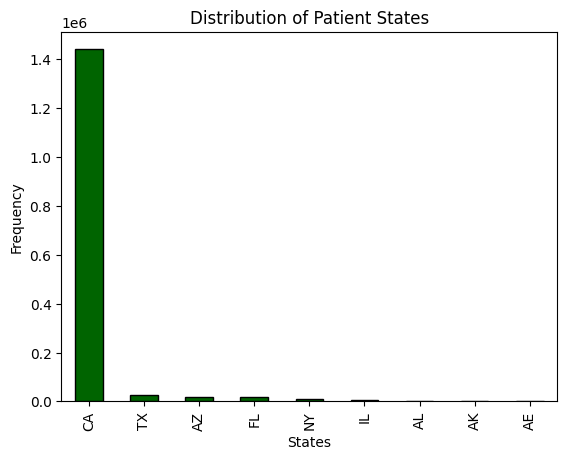

In [182]:
# Plotting a graph to visualise
state_counts = combined.value_counts()

state_counts.plot(kind='bar', color='darkgreen', edgecolor = 'black')
plt.title('Distribution of Patient States')
plt.xlabel('States')
plt.ylabel('Frequency')
plt.show()

**FINDINGS 2:** As seen in Part 1 also, the frequency of CA has very large difference compared to any another state, suggesting either actual usage of ozempic or data collection bias. This bias means of surveying more in California region, it could also include voluntary bias, people reporting more in these states.

In [183]:
# Checking unique values for zip codes
print("Patient Zip:", medicalFile['patient_short_zip'].dropna().unique())

Patient Zip: [922. 900. 921. 910. 913. 911. 912. 908. 853. 995. 352. 105. 852. 996.
 857. 863. 109. 856. 864. 350. 859. 629. 860. 351. 895. 320. 481. 774.
 997. 610. 495. 891. 321. 372. 855. 850.  74. 527. 478. 999. 770. 773.
 112. 720. 782. 370. 787. 776. 170. 523. 998. 330.  88. 923. 606. 612.
 503. 344. 924. 554. 334. 200. 337.  91. 604. 753.]


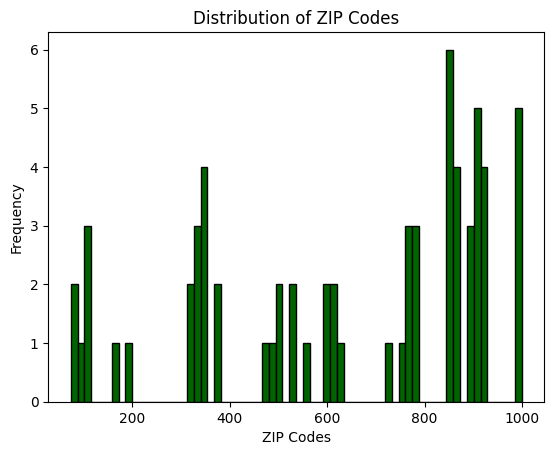

In [184]:
# Plotting histogram to visualise
patientZipFiltered = medicalFile['patient_short_zip'].dropna().unique()

plt.hist(patientZipFiltered, bins=len(patientZipFiltered), color='darkgreen', edgecolor='black')
plt.title('Distribution of ZIP Codes')
plt.xlabel('ZIP Codes')
plt.ylabel('Frequency')
plt.show()

In [185]:
# Fetching codes
zipCodes = medicalFile['patient_short_zip'].dropna().value_counts().head(3)

print("Top 3 ZIP codes:")
print(zipCodes)

Top 3 ZIP codes:
patient_short_zip
900.0    8498
922.0    4368
921.0    3670
Name: count, dtype: int64


**FINDINGS 3:** The graph suggests higher frequency near the zone of 850 - 950. To check this, the file with zip count is sorted in descending order and top 3 codes are extracted. The zip codes, 900 - 'Los Angeles' , 922 - 'Indio', 908 - 'Long beach', all are in California supporting the number of high 'CA' cases.

By researching, it suggests that there was around 150% increase in the ozempic consumption in California. It is common to have this drug prescribed for Type 2 diabetes, which also covers this in insurance. Since, the drug is not cheap, insurance coverage could be treated as a variable as this could be related to the ozempic use. By comparing Los Angeles and long Beach in Data.usa, we could see that there is no relation of population here, however both the places have Mexico origin foreign - residents born. Additionally, the work distribution seemed pretty similar.